# Import Necessary Libraries

In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import missingno as msno

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook, tqdm

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [98]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split functionn
from IPython.display import Image  
from sklearn.naive_bayes import GaussianNB

# Define Path for Dataset & Variable Initialization

In [99]:
malaysia_case_dir = 'C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/cases_malaysia.csv'
state_case_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/cases_state.csv"
checkIn_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/checkin_state.csv"
clusters_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/clusters.csv"
hospital_dir =  "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/hospital.csv"
pkrc_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/pkrc.csv"
malaysia_tests_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/tests_malaysia.csv"
states_tests_dir = "C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/tests_state.csv"

**Time frame is set from 1/7/2021 until 31/8/2021** 
</p> This is because the tests_state dataset on MOH only has data available from 1st of July 2021 to 21st of September 2021. Also, the recent data is more helpful to predict future new Covid-19 cases in Malaysia since the data from 2020 to 2021 is having big differences within short time period. 

In [100]:
start_date = "2021-07-01"
end_date = "2021-08-31"

# <font color='FireBrick'>Question 3 (i)</font> 

## Exploratory Data Analysis (EDA)

Perform EDA by identifying missing value using isna() function, and outliers using box plot, we did not remove outliers because there are important to the datasets and statistically significant.

### Exploratory Data Analysis for Malaysia Case Dataset

In [101]:
malaysia_case_df = pd.read_csv(malaysia_case_dir)
after_start_date = malaysia_case_df["date"] >= start_date
before_end_date = malaysia_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_case_df = malaysia_case_df.loc[between_two_dates]
malaysia_case_df.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
523,2021-07-01,6988,5,5580,0.0,0.0,305.0,41.0,23.0,209.0,1341.0
524,2021-07-02,6982,3,6278,0.0,10.0,339.0,99.0,2.0,13.0,1358.0
525,2021-07-03,6658,11,5677,0.0,0.0,244.0,13.0,3.0,187.0,1152.0
526,2021-07-04,6045,20,5271,0.0,7.0,297.0,73.0,10.0,34.0,1121.0
527,2021-07-05,6387,26,4532,0.0,0.0,350.0,55.0,0.0,40.0,1182.0


In [102]:
malaysia_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 523 to 584
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     62 non-null     object 
 1   cases_new                62 non-null     int64  
 2   cases_import             62 non-null     int64  
 3   cases_recovered          62 non-null     int64  
 4   cluster_import           62 non-null     float64
 5   cluster_religious        62 non-null     float64
 6   cluster_community        62 non-null     float64
 7   cluster_highRisk         62 non-null     float64
 8   cluster_education        62 non-null     float64
 9   cluster_detentionCentre  62 non-null     float64
 10  cluster_workplace        62 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.8+ KB


In [103]:
malaysia_case_df.describe()

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16036.693548,16.709677,12565.241935,0.193548,10.935484,507.919355,68.500000,21.467742,117.548387,1271.483871
std,5344.138169,12.175475,5830.184317,1.128450,14.078085,136.033903,34.836268,20.246609,81.127844,273.556105
min,6045.000000,0.000000,4532.000000,0.000000,0.000000,244.000000,13.000000,0.000000,13.000000,734.000000
25%,11709.750000,7.250000,6392.500000,0.000000,2.000000,416.000000,41.250000,5.500000,63.500000,1072.500000
50%,17160.000000,13.500000,12238.000000,0.000000,6.000000,494.000000,66.000000,16.500000,93.500000,1246.000000
75%,20591.750000,25.000000,17679.000000,0.000000,15.750000,597.750000,84.000000,29.750000,173.500000,1461.000000
max,24599.000000,58.000000,22657.000000,8.000000,88.000000,825.000000,189.000000,92.000000,369.000000,2135.000000


In [104]:
nRow, nCol = malaysia_case_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 62 rows and 11 columns


In [105]:
malaysia_case_df.isna().sum()

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

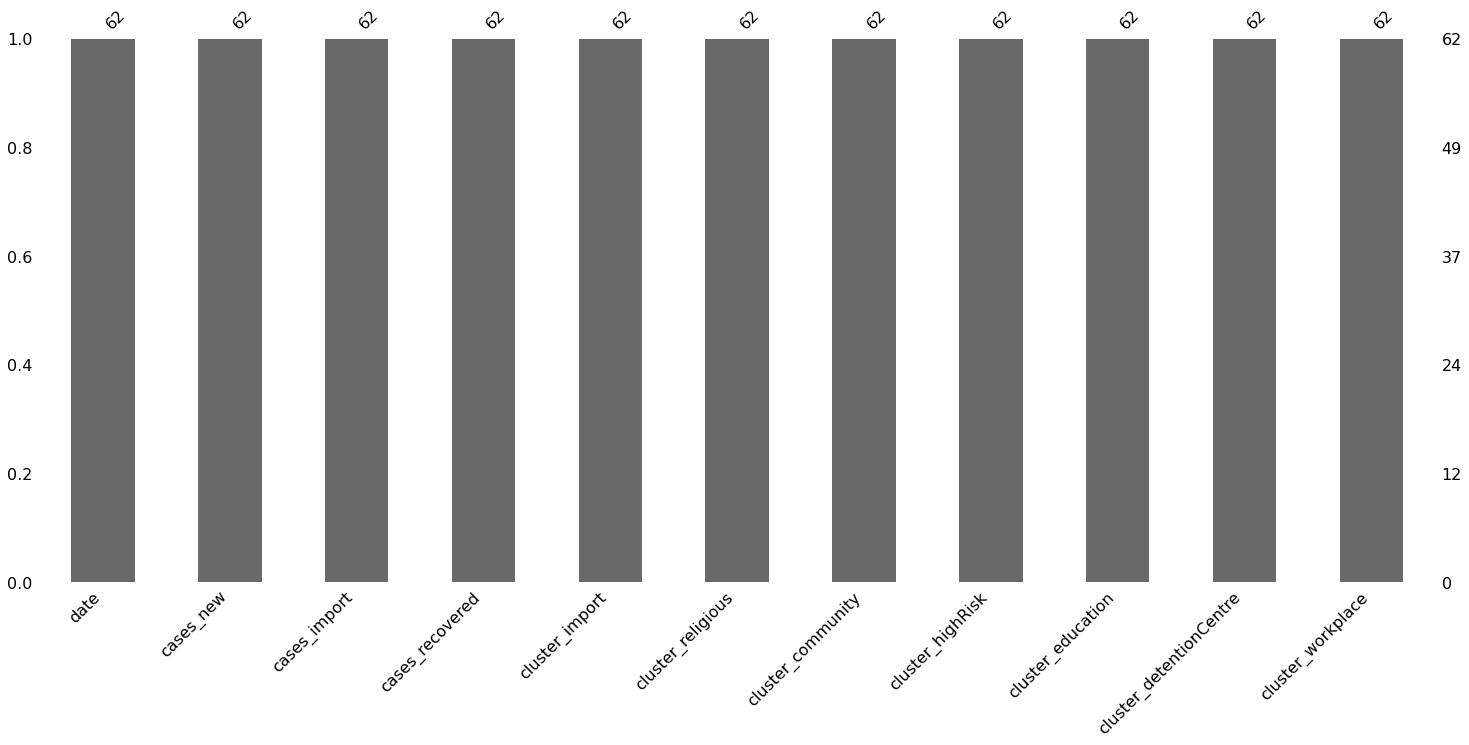

In [106]:
msno.bar(malaysia_case_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'cluster_workplace')

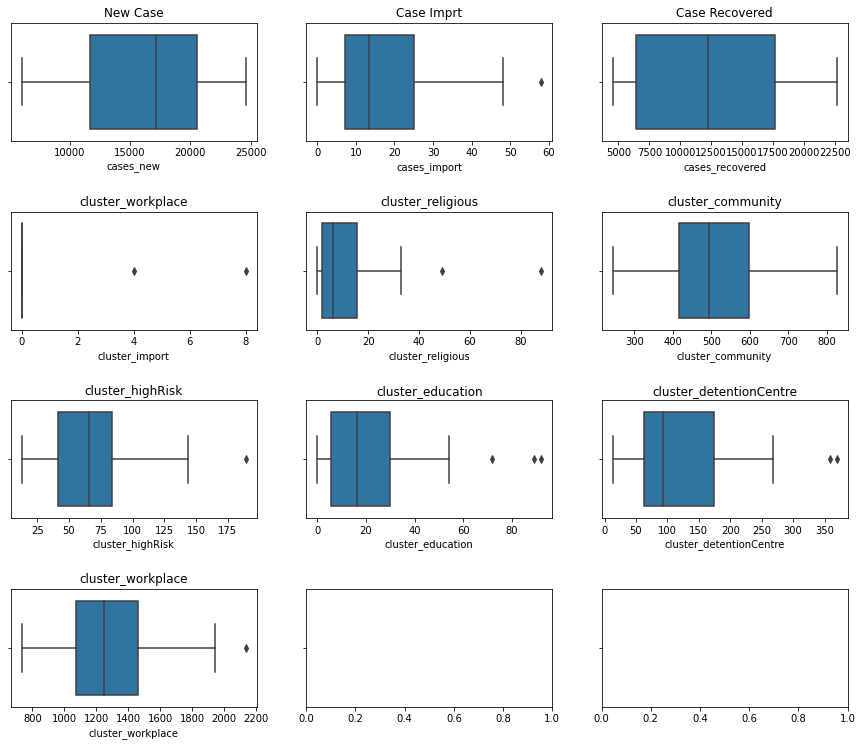

In [107]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('New Case')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_import"],ax=axes[0][1])
axes[0][1].set_title('Case Imprt')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_recovered"],ax=axes[0][2])
axes[0][2].set_title('Case Recovered')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_import"],ax=axes[1][0])
axes[1][0].set_title('cluster_workplace')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_religious"],ax=axes[1][1])
axes[1][1].set_title('cluster_religious')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_community"],ax=axes[1][2])
axes[1][2].set_title('cluster_community')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_highRisk"],ax=axes[2][0])
axes[2][0].set_title('cluster_highRisk')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_education"],ax=axes[2][1])
axes[2][1].set_title('cluster_education')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_detentionCentre"],ax=axes[2][2])
axes[2][2].set_title('cluster_detentionCentre')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_workplace"],ax=axes[3][0])
axes[3][0].set_title('cluster_workplace')

### Exploratory Data Analysis for State Case Dataset

In [108]:
state_case_df = pd.read_csv(state_case_dir)
after_start_date = state_case_df["date"] >= start_date
before_end_date = state_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_case_df = state_case_df.loc[between_two_dates]
state_case_df.head()

,date,state,cases_import,cases_new,cases_recovered
8368,2021-07-01,Johor,1,270,361
8369,2021-07-01,Kedah,0,250,186
8370,2021-07-01,Kelantan,0,108,208
8371,2021-07-01,Melaka,0,311,317
8372,2021-07-01,Negeri Sembilan,0,692,883


In [109]:
state_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 8368 to 9359
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             992 non-null    object
 1   state            992 non-null    object
 2   cases_import     992 non-null    int64 
 3   cases_new        992 non-null    int64 
 4   cases_recovered  992 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 46.5+ KB


In [110]:
state_case_df.describe()

,cases_import,cases_new,cases_recovered
count,992.000000,992.000000,992.000000
mean,1.044355,1002.293347,785.327621
std,3.885865,1427.354131,1271.117746
min,0.000000,0.000000,0.000000
25%,0.000000,206.750000,128.750000
50%,0.000000,570.500000,415.500000
75%,0.000000,1216.000000,830.500000
max,55.000000,8792.000000,8801.000000


In [111]:
state_case_df.groupby([state_case_df['date']]).sum()

,cases_import,cases_new,cases_recovered
date,,,
2021-07-01,5,6988,5580
2021-07-02,3,6982,6278
2021-07-03,11,6658,5677
2021-07-04,20,6045,5271
2021-07-05,26,6387,4532
...,...,...,...
2021-08-27,15,22070,21877
2021-08-28,12,22597,19492
2021-08-29,7,20579,20845


In [112]:
state_case_df.isna().sum()

date               0
state              0
cases_import       0
cases_new          0
cases_recovered    0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

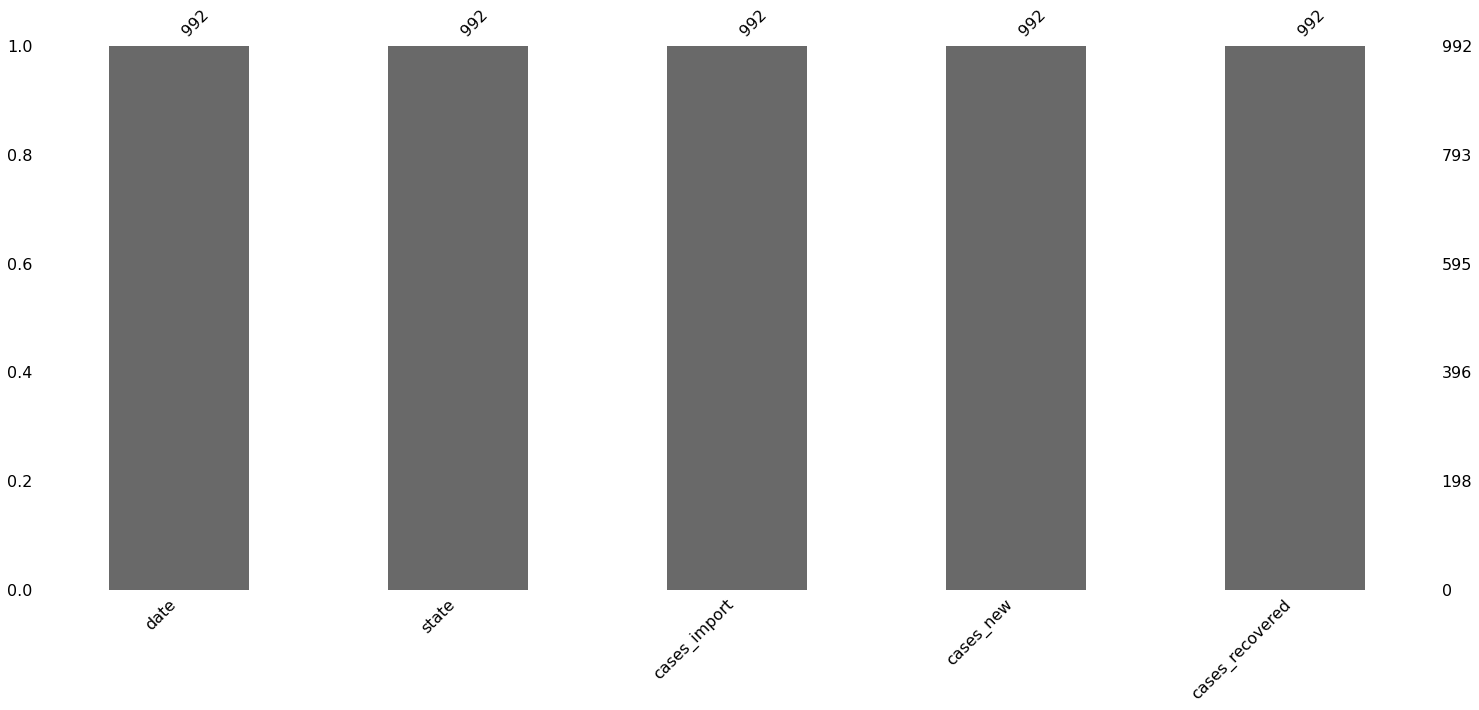

In [113]:
msno.bar(state_case_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'Recovered Case')

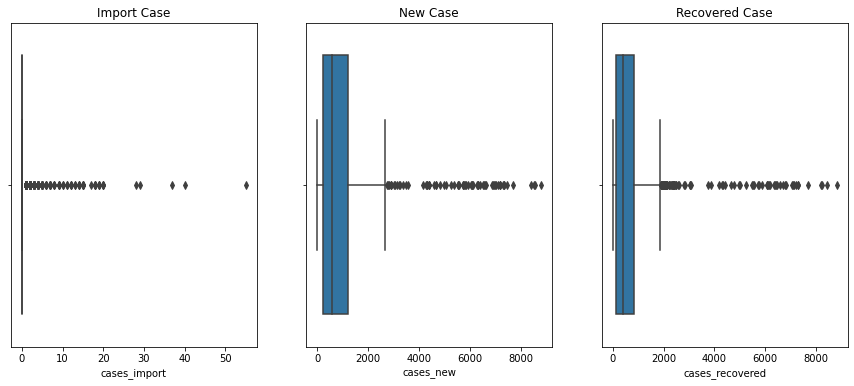

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=1, wspace=0.2, hspace=0.6)

# sns.boxplot(data=state_case_df,x=state_case_df["cases_new"],ax=axes[0][0])
# axes[0][0].set_title('Date')
# sns.boxplot(data=state_case_df,x=state_case_df["cases_new"],ax=axes[0][1])
# axes[0][1].set_title('State')
sns.boxplot(data=state_case_df,x=state_case_df["cases_import"],ax=axes[0])
axes[0].set_title('Import Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_new"],ax=axes[1])
axes[1].set_title('New Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_recovered"],ax=axes[2])
axes[2].set_title('Recovered Case')

### Exploratory Data Analysis for Clusters Dataset

In [115]:
clusters_df = pd.read_csv(clusters_dir)
after_start_date = clusters_df["date_announced"] >= start_date
before_end_date = clusters_df["date_announced"] <= end_date
between_two_dates = after_start_date & before_end_date
clusters_df = clusters_df.loc[between_two_dates]
clusters_df['date'] = clusters_df.date_announced
clusters_df.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,date
2845,Kluster Industri Perusahaan Selesa Jaya,Selangor,Hulu Langat,2021-07-01,2021-06-30,workplace,ended,0,13,0,67,0,0,13,2021-07-01
2846,Kluster Kampung Bagus,Kelantan,Pasir Mas,2021-07-01,2021-06-30,community,ended,0,8,0,14,0,0,8,2021-07-01
2847,Kluster Taman SP Mahang,Kelantan,Kota Bharu,2021-07-01,2021-06-30,community,ended,0,8,0,14,0,0,8,2021-07-01
2848,Kluster Dah Tanjung Setol,Kedah,Pendang,2021-07-01,2021-06-30,community,ended,0,31,0,61,0,0,31,2021-07-01
2849,Kluster Kampung Redang Gunong,Kelantan,"Bachok, Kota Bharu, Tanah Merah",2021-07-01,2021-07-01,community,ended,0,10,0,19,0,0,10,2021-07-01


In [116]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 2845 to 4730
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cluster          1886 non-null   object
 1   state            1886 non-null   object
 2   district         1886 non-null   object
 3   date_announced   1886 non-null   object
 4   date_last_onset  1886 non-null   object
 5   category         1886 non-null   object
 6   status           1886 non-null   object
 7   cases_new        1886 non-null   int64 
 8   cases_total      1886 non-null   int64 
 9   cases_active     1886 non-null   int64 
 10  tests            1886 non-null   int64 
 11  icu              1886 non-null   int64 
 12  deaths           1886 non-null   int64 
 13  recovered        1886 non-null   int64 
 14  date             1886 non-null   object
dtypes: int64(7), object(8)
memory usage: 235.8+ KB


In [117]:
clusters_df.describe()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.166490,77.528102,10.995758,235.092259,0.020148,0.398197,66.133616
std,2.442736,116.985016,36.605851,403.282586,0.144271,1.329916,103.774849
min,0.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,49.000000,0.000000,0.000000,17.000000
50%,0.000000,42.000000,0.000000,107.500000,0.000000,0.000000,34.000000
75%,0.000000,84.000000,5.000000,250.750000,0.000000,0.000000,73.000000
max,75.000000,1645.000000,755.000000,5820.000000,2.000000,25.000000,1643.000000


In [118]:
cluster_count_by_state = clusters_df.groupby([clusters_df['state']]).count().loc[['Johor','Pahang','Kedah','Selangor']]['cluster']
clusters_df = clusters_df.groupby([clusters_df['state']]).sum().loc[['Johor','Pahang','Kedah','Selangor']]
clusters_df['cluster_total'] = cluster_count_by_state

In [119]:
clusters_df.isna().sum()

cases_new        0
cases_total      0
cases_active     0
tests            0
icu              0
deaths           0
recovered        0
cluster_total    0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

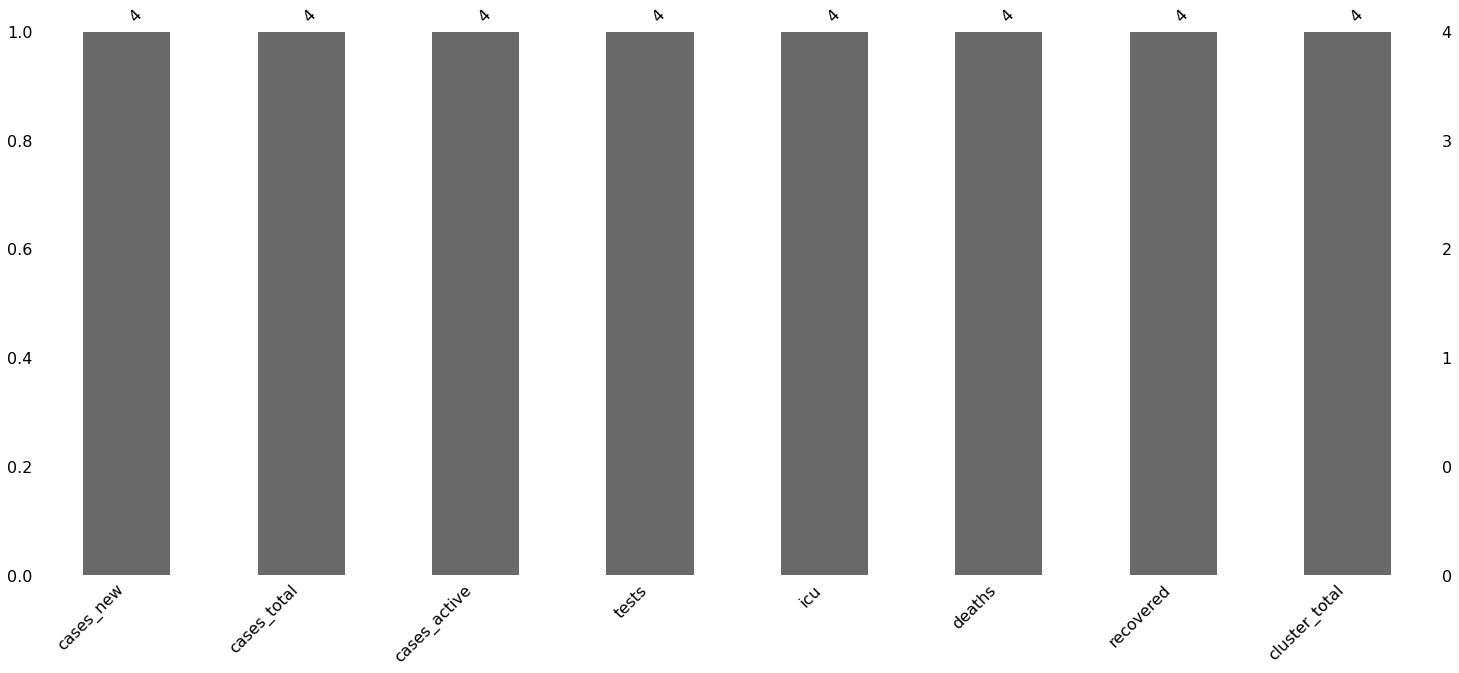

In [120]:
msno.bar(clusters_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'recovered')

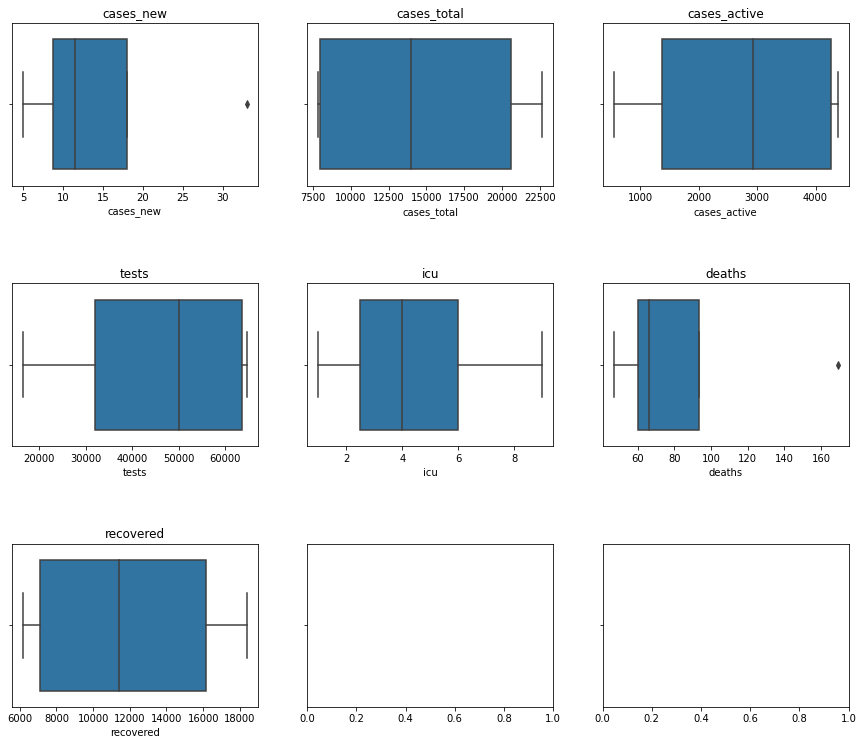

In [121]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=clusters_df,x=clusters_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('cases_new')

sns.boxplot(data=clusters_df,x=clusters_df["cases_total"],ax=axes[0][1])
axes[0][1].set_title('cases_total')

sns.boxplot(data=clusters_df,x=clusters_df["cases_active"],ax=axes[0][2])
axes[0][2].set_title('cases_active')

sns.boxplot(data=clusters_df,x=clusters_df["tests"],ax=axes[1][0])
axes[1][0].set_title('tests')

sns.boxplot(data=clusters_df,x=clusters_df["icu"],ax=axes[1][1])
axes[1][1].set_title('icu')

sns.boxplot(data=clusters_df,x=clusters_df["deaths"],ax=axes[1][2])
axes[1][2].set_title('deaths')

sns.boxplot(data=clusters_df,x=clusters_df["recovered"],ax=axes[2][0])
axes[2][0].set_title('recovered')

### Exploratory Data Analysis for Malaysia Tests Dataset

In [122]:
print(malaysia_tests_dir)

C:/Users/Owner/Desktop/Data Mining/Assignment/Covid-19-Analysis-Streamlit/dataset/tests_malaysia.csv


In [123]:
malaysia_tests_df = pd.read_csv(malaysia_tests_dir)
after_start_date = malaysia_tests_df["date"] >= start_date
before_end_date = malaysia_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_tests_df = malaysia_tests_df.loc[between_two_dates]
malaysia_tests_df.head()

,date,rtk-ag,pcr
524,2021-07-01,43219,54811
525,2021-07-02,40860,55642
526,2021-07-03,30817,55023
527,2021-07-04,26064,42657
528,2021-07-05,44941,41819


In [124]:
malaysia_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 524 to 585
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   rtk-ag  62 non-null     int64 
 2   pcr     62 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [125]:
malaysia_tests_df.describe()

,rtk-ag,pcr
count,62.00000,62.000000
mean,69147.66129,68683.677419
std,18475.25760,11299.659488
min,26064.00000,41819.000000
25%,54739.75000,59948.750000
50%,72232.50000,70748.000000
75%,83276.00000,75953.750000
max,96219.00000,90293.000000


In [126]:
malaysia_tests_df.isna().sum()

date      0
rtk-ag    0
pcr       0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

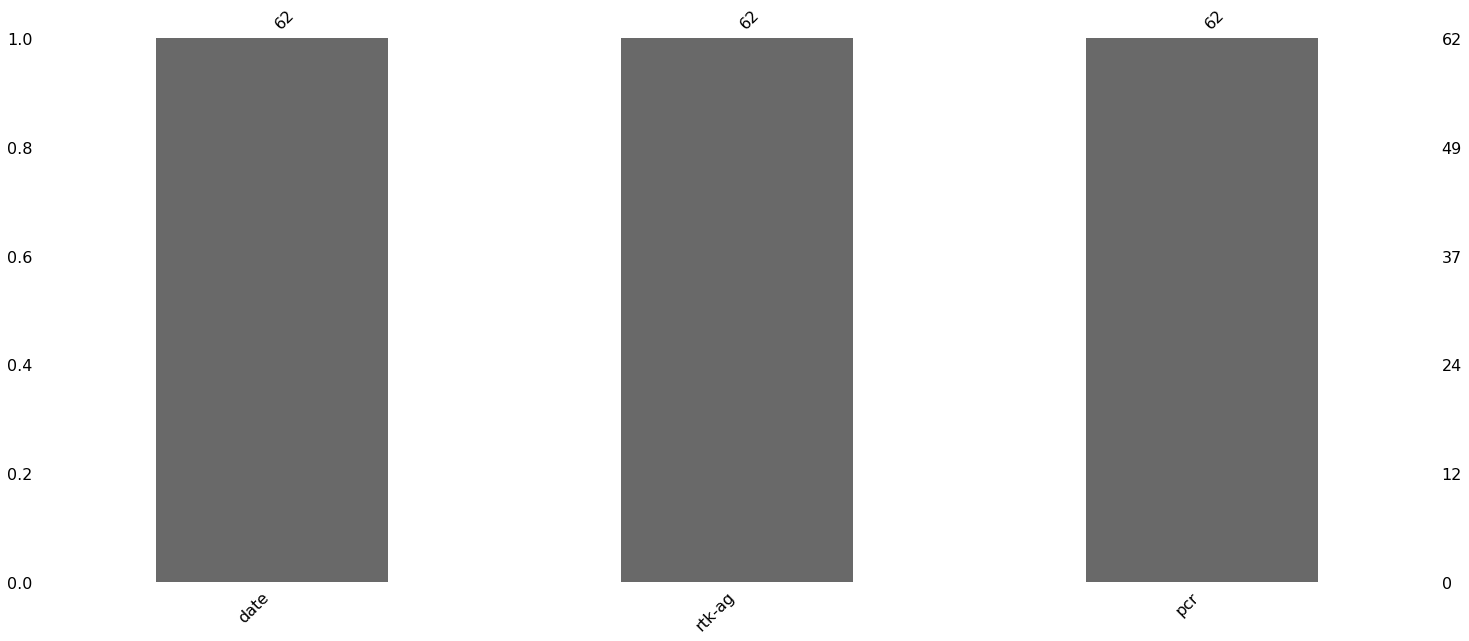

In [127]:
msno.bar(malaysia_tests_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'pcr')

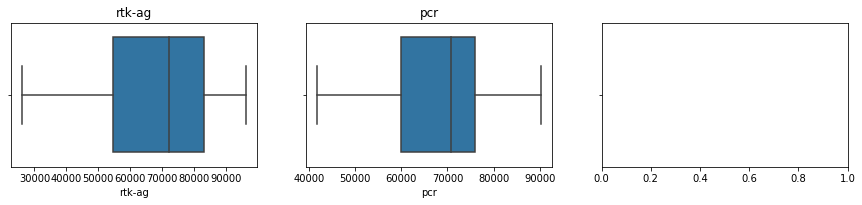

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_tests_df, x = malaysia_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=malaysia_tests_df,x = malaysia_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')

### Exploratory Data Analysis for State Tests Dataset

In [129]:
states_tests_df = pd.read_csv(states_tests_dir)
after_start_date = states_tests_df["date"] >= start_date
before_end_date = states_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
states_tests_df = states_tests_df.loc[between_two_dates]
states_tests_df.head()

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


In [130]:
states_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    992 non-null    object
 1   state   992 non-null    object
 2   rtk-ag  992 non-null    int64 
 3   pcr     992 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 38.8+ KB


In [131]:
states_tests_df.describe()

,rtk-ag,pcr
count,992.000000,992.000000
mean,4321.728831,4292.729839
std,6006.077856,4202.906254
min,9.000000,13.000000
25%,1217.250000,1668.250000
50%,2528.000000,3286.500000
75%,4806.250000,5260.500000
max,41143.000000,23350.000000


In [132]:
states_tests_df.isna().sum()

date      0
state     0
rtk-ag    0
pcr       0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

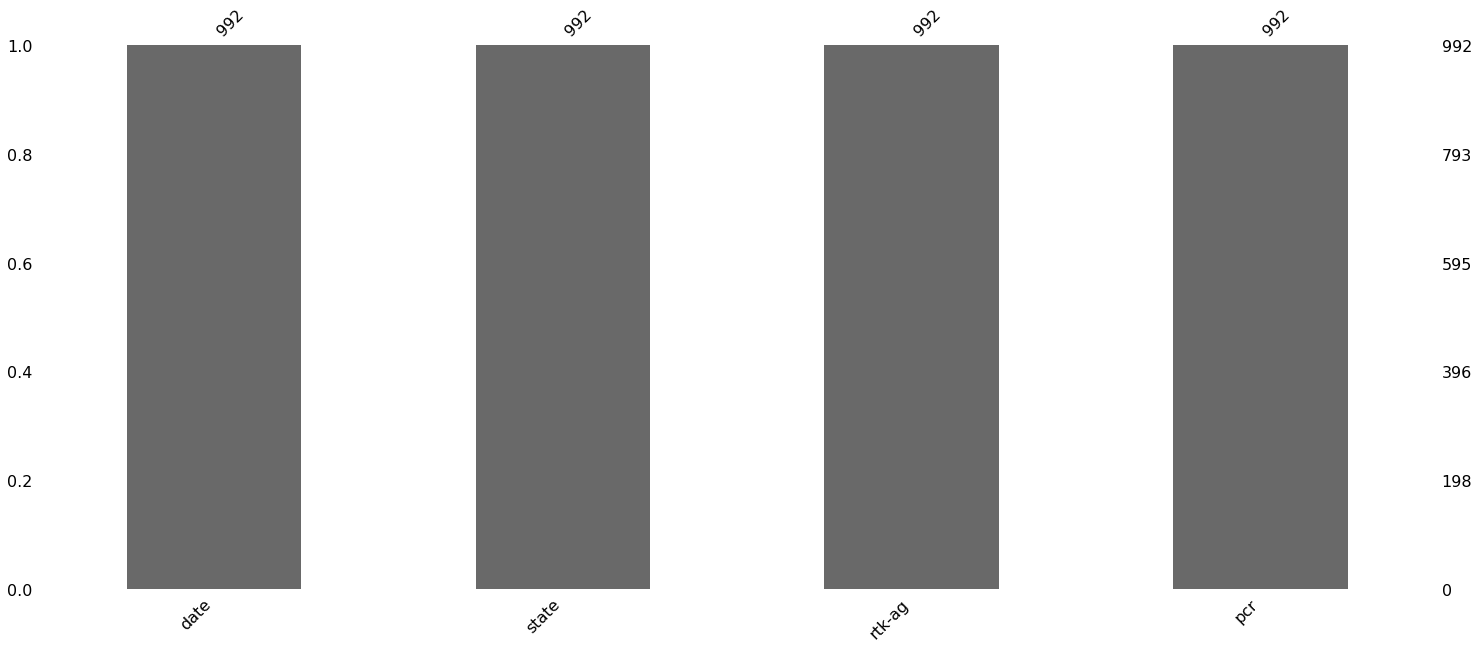

In [133]:
msno.bar(states_tests_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'pcr')

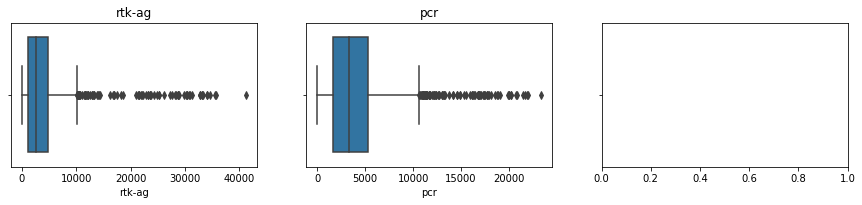

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=states_tests_df, x = states_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=states_tests_df,x = states_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')

### Exploratory Data Analysis for PKRC Dataset

In [135]:
pkrc_df = pd.read_csv(pkrc_dir)
after_start_date = pkrc_df["date"] >= start_date
before_end_date = pkrc_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
pkrc_df = pkrc_df.loc[between_two_dates]
pkrc_df.head()

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
5163,2021-07-01,Johor,2321,0,103,103,0,152,152,964,0,0
5164,2021-07-01,Kedah,540,0,71,71,0,55,55,348,0,0
5165,2021-07-01,Kelantan,2763,11,96,107,9,133,142,638,73,0
5166,2021-07-01,Melaka,1662,0,181,181,0,95,95,886,0,0
5167,2021-07-01,Negeri Sembilan,2395,0,191,191,0,98,98,1248,0,0


In [136]:
pkrc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 5163 to 6030
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             868 non-null    object
 1   state            868 non-null    object
 2   beds             868 non-null    int64 
 3   admitted_pui     868 non-null    int64 
 4   admitted_covid   868 non-null    int64 
 5   admitted_total   868 non-null    int64 
 6   discharge_pui    868 non-null    int64 
 7   discharge_covid  868 non-null    int64 
 8   discharge_total  868 non-null    int64 
 9   pkrc_covid       868 non-null    int64 
 10  pkrc_pui         868 non-null    int64 
 11  pkrc_noncovid    868 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 88.2+ KB


In [137]:
pkrc_df.describe()

,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,2615.232719,6.188940,193.182028,199.370968,4.858295,176.866359,181.724654,1417.392857,53.918203,14.052995
std,1999.143695,13.886881,170.680034,175.043789,13.741961,171.242991,173.891869,1139.694369,103.075605,60.242910
min,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1290.750000,0.000000,70.000000,72.000000,0.000000,52.750000,54.000000,469.250000,0.000000,0.000000
50%,2104.000000,0.000000,151.000000,153.000000,0.000000,127.500000,131.000000,1030.000000,6.000000,0.000000
75%,3261.000000,6.000000,275.750000,288.500000,4.000000,263.000000,275.750000,2315.250000,56.000000,0.000000
max,8696.000000,168.000000,1187.000000,1207.000000,180.000000,1077.000000,1077.000000,5476.000000,729.000000,1255.000000


In [138]:
pkrc_df.isna().sum()

date               0
state              0
beds               0
admitted_pui       0
admitted_covid     0
admitted_total     0
discharge_pui      0
discharge_covid    0
discharge_total    0
pkrc_covid         0
pkrc_pui           0
pkrc_noncovid      0
dtype: int64

##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

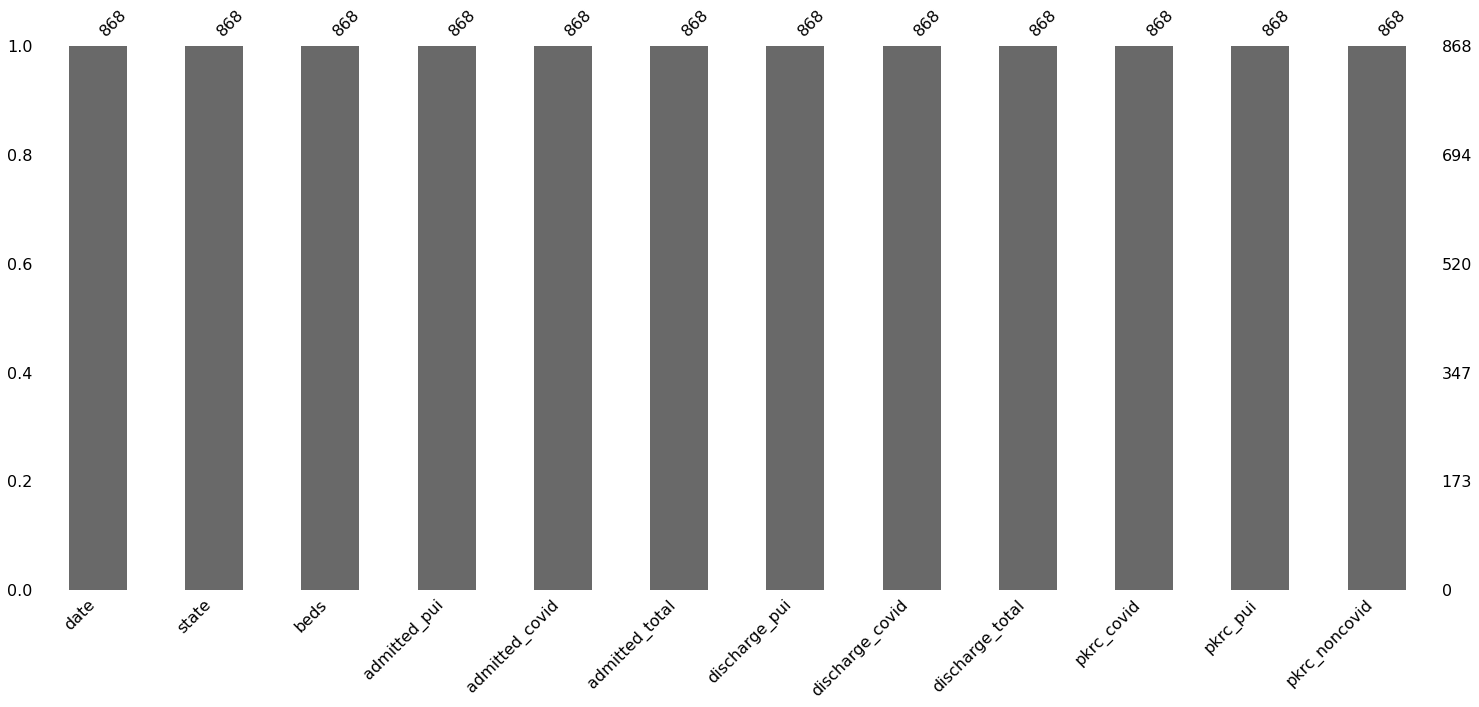

In [139]:
msno.bar(pkrc_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'pkrc_noncovid')

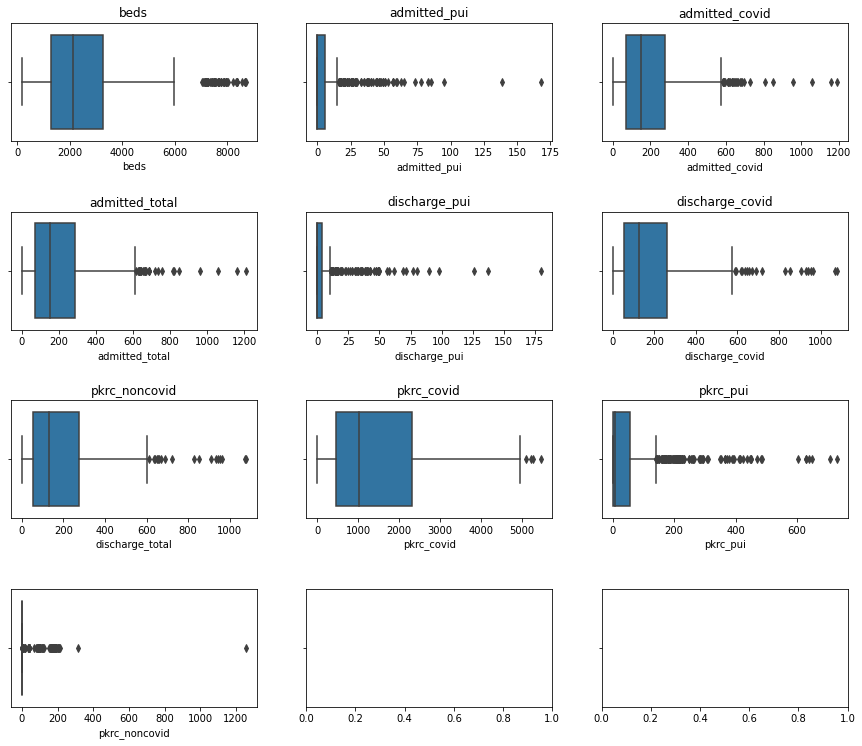

In [140]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=pkrc_df, x = pkrc_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_pui"],ax=axes[0][1])
axes[0][1].set_title('admitted_pui')
sns.boxplot(data=pkrc_df, x = pkrc_df["admitted_covid"],ax=axes[0][2])
axes[0][2].set_title("admitted_covid")
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_total"],ax=axes[1][0])
axes[1][0].set_title('admitted_total')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_pui"],ax=axes[1][1])
axes[1][1].set_title('discharge_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["discharge_covid"],ax=axes[1][2])
axes[1][2].set_title('discharge_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_total"],ax=axes[2][0])
axes[2][0].set_title('discharge_total')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_covid"],ax=axes[2][1])
axes[2][1].set_title('pkrc_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["pkrc_pui"],ax=axes[2][2])
axes[2][2].set_title('pkrc_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_noncovid"],ax=axes[3][0])
axes[2][0].set_title('pkrc_noncovid')

### Exploratory Data Analaysis for Mysejahtera CheckIn Dataset

In [141]:
checkIn_df = pd.read_csv(checkIn_dir)
after_start_date = checkIn_df["date"] >= start_date
before_end_date = checkIn_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
checkIn_df = checkIn_df.loc[between_two_dates]
checkIn_df.head()

,date,state,checkins,unique_ind,unique_loc
3392,2021-07-01,Johor,2093025,1046923,80161
3393,2021-07-01,Kedah,764979,423792,35235
3394,2021-07-01,Kelantan,302379,172269,21977
3395,2021-07-01,Melaka,490636,257934,20042
3396,2021-07-01,Negeri Sembilan,596917,314375,22793


In [142]:
checkIn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 3392 to 4383
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        992 non-null    object
 1   state       992 non-null    object
 2   checkins    992 non-null    int64 
 3   unique_ind  992 non-null    int64 
 4   unique_loc  992 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 46.5+ KB


In [143]:
checkIn_df.describe()

,checkins,unique_ind,unique_loc
count,9.920000e+02,9.920000e+02,992.000000
mean,1.131953e+06,5.583087e+05,38258.386089
std,1.090926e+06,5.507102e+05,31122.174494
min,2.741600e+04,1.532600e+04,779.000000
25%,3.208090e+05,1.804750e+05,17987.000000
50%,7.323920e+05,3.745795e+05,32091.500000
75%,1.508238e+06,6.425605e+05,54459.250000
max,5.312835e+06,2.571037e+06,159863.000000


In [144]:
checkIn_null_df=pd.DataFrame({'Column':checkIn_df.isna().sum().index, 'Count of Null Values':checkIn_df.isna().sum().values})  
checkIn_null_df

,Column,Count of Null Values
0,date,0
1,state,0
2,checkins,0
3,unique_ind,0
4,unique_loc,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

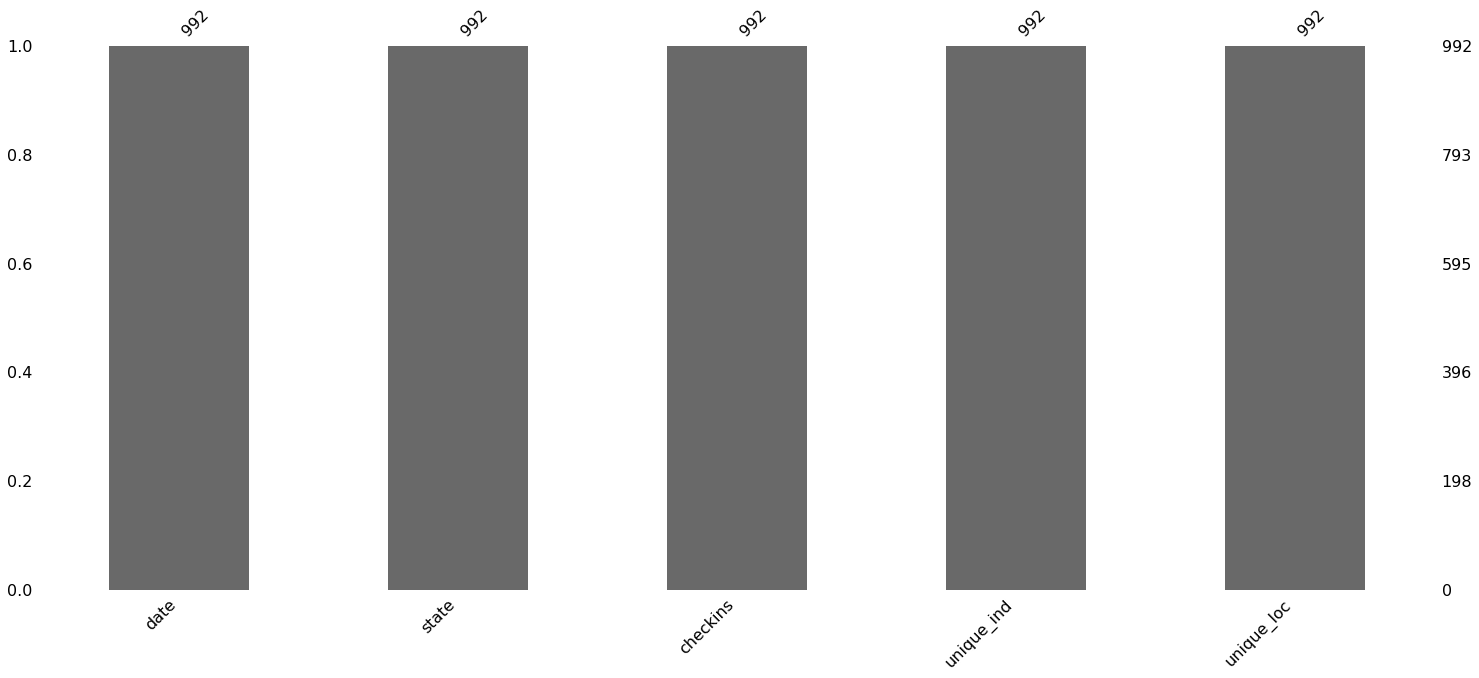

In [145]:
msno.bar(checkIn_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'unique_loc')

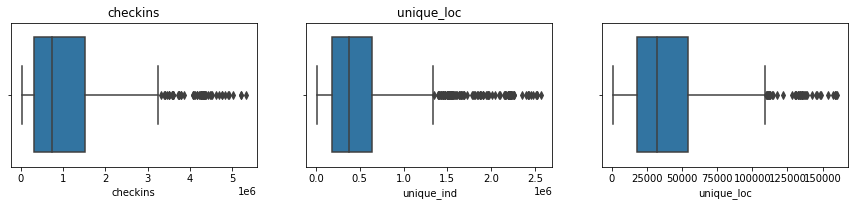

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=checkIn_df, x = checkIn_df["checkins"],ax=axes[0])
axes[0].set_title('checkins')
sns.boxplot(data=checkIn_df,x = checkIn_df["unique_ind"],ax=axes[1])
axes[1].set_title('unique_ind')
sns.boxplot(data=checkIn_df, x = checkIn_df["unique_loc"],ax=axes[2])
axes[1].set_title('unique_loc')

#### Exploratory Data Analysis for Hospital Dataset

In [147]:
hospital_df = pd.read_csv(hospital_dir)
after_start_date = hospital_df["date"] >= start_date
before_end_date = hospital_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
hospital_df = hospital_df.loc[between_two_dates]
hospital_df.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
7011,2021-07-01,Johor,5090,1535,4903,178,131,309,130,117,247,732,233,3051
7012,2021-07-01,Kedah,2755,661,2639,1,70,71,0,32,32,338,2,1650
7013,2021-07-01,Kelantan,2737,559,2593,13,59,72,14,49,63,297,18,1439
7014,2021-07-01,Melaka,1101,290,987,18,56,74,10,40,50,397,23,579
7015,2021-07-01,Negeri Sembilan,1431,1084,1366,6,147,153,4,96,100,861,12,456


In [148]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 7011 to 8002
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              992 non-null    object
 1   state             992 non-null    object
 2   beds              992 non-null    int64 
 3   beds_covid        992 non-null    int64 
 4   beds_noncrit      992 non-null    int64 
 5   admitted_pui      992 non-null    int64 
 6   admitted_covid    992 non-null    int64 
 7   admitted_total    992 non-null    int64 
 8   discharged_pui    992 non-null    int64 
 9   discharged_covid  992 non-null    int64 
 10  discharged_total  992 non-null    int64 
 11  hosp_covid        992 non-null    int64 
 12  hosp_pui          992 non-null    int64 
 13  hosp_noncovid     992 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 116.2+ KB


In [149]:
hospital_df.describe()

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2578.852823,997.365927,2447.864919,28.313508,121.756048,150.069556,20.640121,94.758065,115.398185,746.093750,73.986895,1080.698589
std,1731.927256,955.364124,1644.444511,40.403808,132.212924,160.858150,31.286646,106.786375,129.582936,838.773968,90.789779,694.907817
min,122.000000,25.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1307.000000,426.000000,1220.500000,4.000000,33.750000,43.000000,1.000000,25.000000,30.000000,254.000000,14.000000,531.000000
50%,2457.000000,812.000000,2349.500000,11.000000,76.000000,90.000000,7.500000,55.500000,68.500000,471.500000,35.000000,977.000000
75%,3699.000000,1165.000000,3517.000000,26.000000,159.000000,181.250000,19.250000,117.000000,128.250000,908.250000,89.500000,1532.250000
max,6568.000000,4713.000000,6164.000000,198.000000,748.000000,797.000000,236.000000,613.000000,721.000000,4218.000000,386.000000,3069.000000


In [150]:
hospital_df_null_df=pd.DataFrame({'Column':hospital_df.isna().sum().index, 'Count of Null Values':hospital_df.isna().sum().values})  
hospital_df_null_df

,Column,Count of Null Values
0,date,0
1,state,0
2,beds,0
3,beds_covid,0
4,beds_noncrit,0
5,admitted_pui,0
6,admitted_covid,0
7,admitted_total,0
8,discharged_pui,0
9,discharged_covid,0


##### Identify Missing Value
</p> Visualize the number of missing values as a bar chart

<AxesSubplot:>

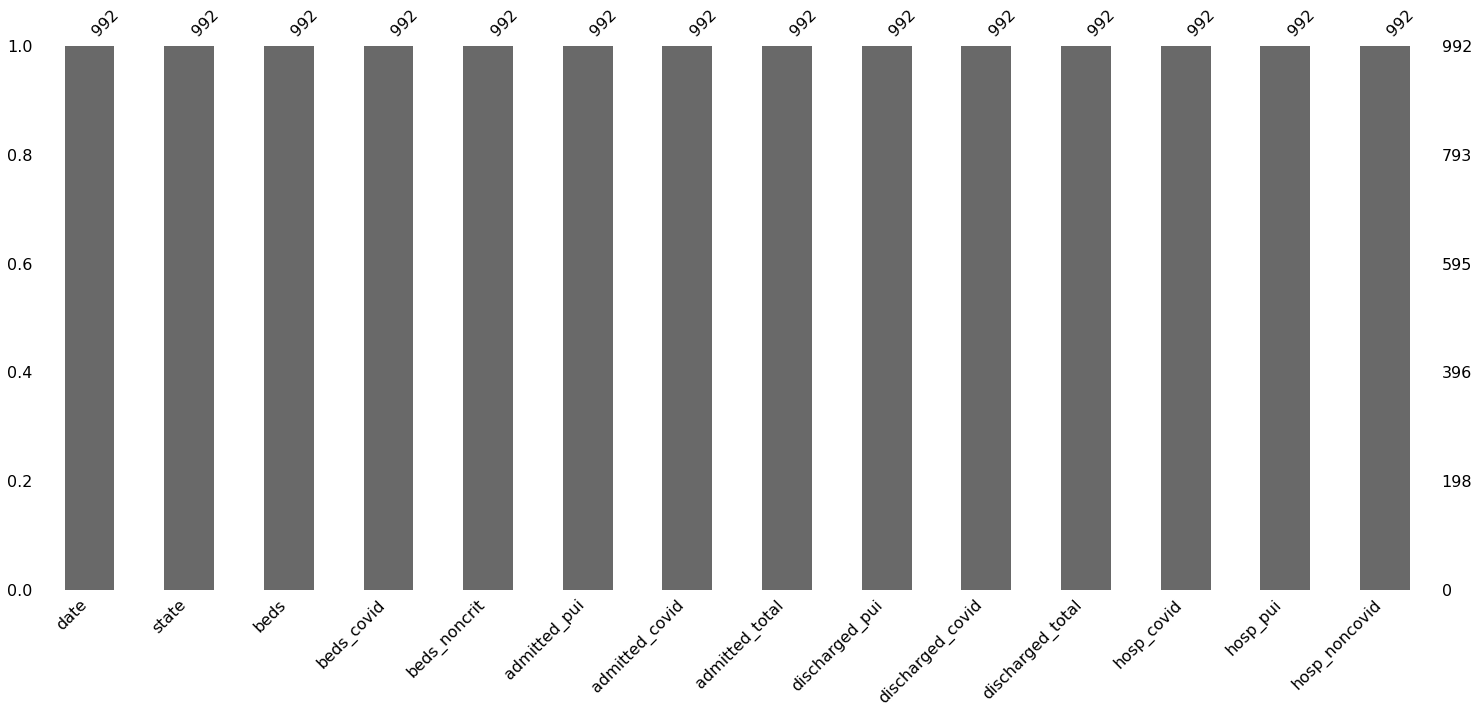

In [151]:
msno.bar(hospital_df)

##### Identify Outliers
</p> Visualize the data using box plot, check the distribution of data and outliers

Text(0.5, 1.0, 'hosp_noncovid')

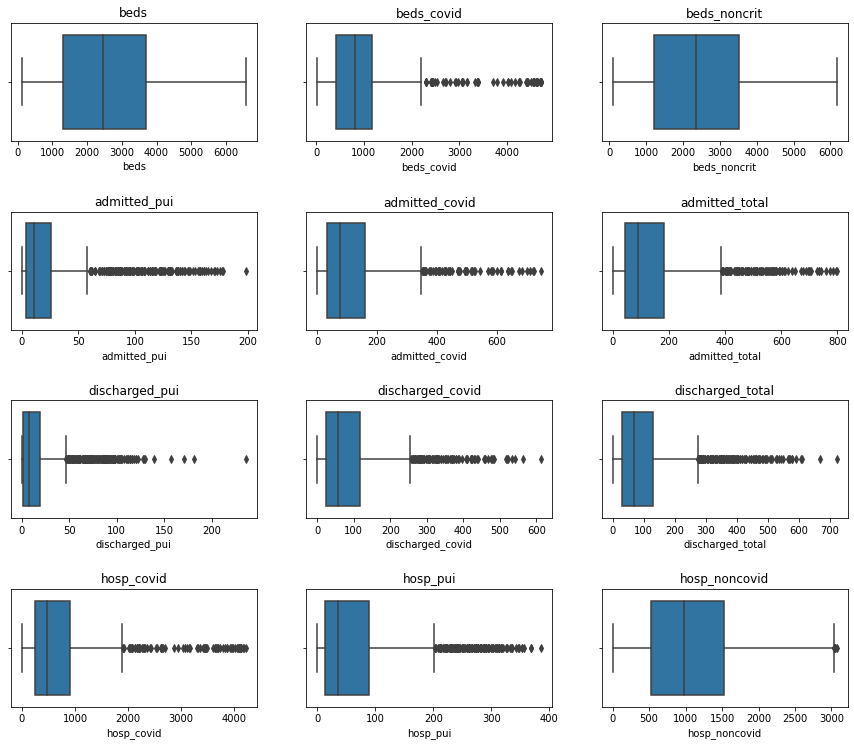

In [152]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('Outliers Visualization')
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

# beds	beds_covid	beds_noncrit	admitted_pui	admitted_covid	admitted_total	discharged_pui	discharged_covid	discharged_total	hosp_covid	
# hosp_pui	hosp_noncovid

sns.boxplot(data=hospital_df, x = hospital_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=hospital_df,x = hospital_df["beds_covid"],ax=axes[0][1])
axes[0][1].set_title('beds_covid')
sns.boxplot(data=hospital_df, x = hospital_df["beds_noncrit"],ax=axes[0][2])
axes[0][2].set_title('beds_noncrit')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_pui"],ax=axes[1][0])
axes[1][0].set_title('admitted_pui')
sns.boxplot(data=hospital_df,x = hospital_df["admitted_covid"],ax=axes[1][1])
axes[1][1].set_title('admitted_covid')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_total"],ax=axes[1][2])
axes[1][2].set_title('admitted_total')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_pui"],ax=axes[2][0])
axes[2][0].set_title('discharged_pui')
sns.boxplot(data=hospital_df,x = hospital_df["discharged_covid"],ax=axes[2][1])
axes[2][1].set_title('discharged_covid')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_total"],ax=axes[2][2])
axes[2][2].set_title('discharged_total')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_covid"],ax=axes[3][0])
axes[3][0].set_title('hosp_covid')
sns.boxplot(data=hospital_df,x = hospital_df["hosp_pui"],ax=axes[3][1])
axes[3][1].set_title('hosp_pui')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_noncovid"],ax=axes[3][2])
axes[3][2].set_title('hosp_noncovid')

# <font color='FireBrick'>Question 3 (ii)</font>

### Data Preprocessing with One-Hot Encoding

Before finding the relationship between the states, we perform One-Hot encoding to preprocess the state cases dataset.

In [153]:
state_case_df = pd.get_dummies(state_case_df, prefix='', columns=['state'])
state_case_df

,date,cases_import,cases_new,cases_recovered,_Johor,_Kedah,_Kelantan,_Melaka,_Negeri Sembilan,_Pahang,_Perak,_Perlis,_Pulau Pinang,_Sabah,_Sarawak,_Selangor,_Terengganu,_W.P. Kuala Lumpur,_W.P. Labuan,_W.P. Putrajaya
8368,2021-07-01,1,270,361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8369,2021-07-01,0,250,186,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8370,2021-07-01,0,108,208,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8371,2021-07-01,0,311,317,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8372,2021-07-01,0,692,883,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2021-08-31,1,4371,3729,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9356,2021-08-31,0,608,505,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9357,2021-08-31,0,1003,1678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9358,2021-08-31,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [154]:
state_case_import_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_import"], axis="index")
state_case_new_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_new"], axis="index")
state_case_recovered_df = state_case_df.loc[:,'_Johor':].multiply(state_case_df["cases_recovered"], axis="index")

In [155]:
state_case_import_df.columns = state_case_import_df.columns.str[1:]
state_case_import_df.head()

,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
8368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
date = state_case_df.date
state_case_import_df['date'] = date
state_case_new_df['date'] = date
state_case_recovered_df['date'] = date

In [159]:
state_case_import_df = state_case_import_df.groupby([state_case_import_df['date']]).sum()
state_case_new_df = state_case_new_df.groupby([state_case_new_df['date']]).sum()
state_case_recovered_df = state_case_recovered_df.groupby([state_case_recovered_df['date']]).sum()

Text(0.5, 1.0, 'New Case Correlation Heatmap')

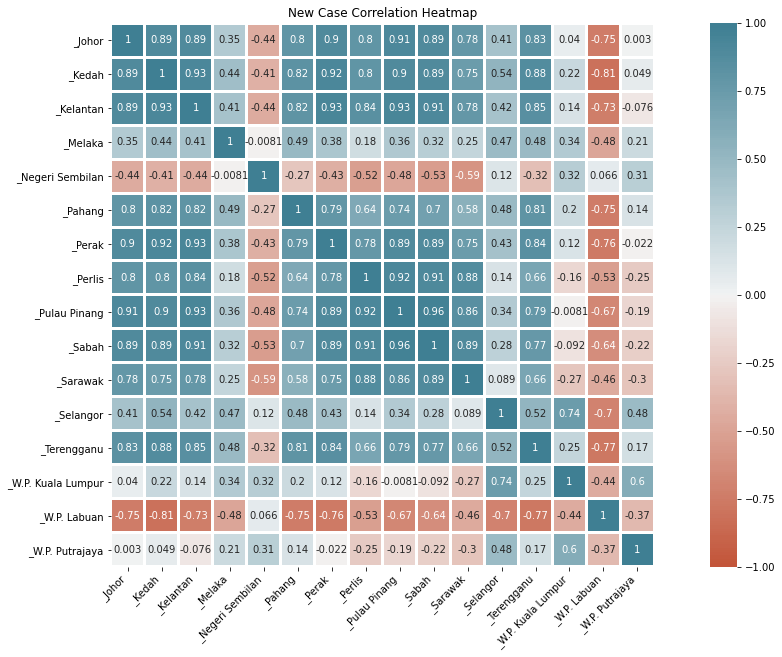

In [160]:
corr = state_case_new_df.corr()
fig, ax = plt.subplots(figsize=(20,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    linewidths = 2
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('New Case Correlation Heatmap')

# <font color='FireBrick'>Question 3 (iii)</font>

Pre-processing the needed datasets : **Cluster, State Cases, Tests，Mysejahtera checkins, PKRC, Hospital** </p> We use data of 4 states in Malaysia to perform feature selection : **Pahang, Johor, Kedah, Selangor**. </p>

In [161]:
state = ["Pahang","Kedah","Johor","Selangor"]
clusters_df = clusters_df.loc[clusters_df['state'].isin(state)]
clusters_df['date'] = clusters_df.date_announced
state_case_df = state_case_df.loc[state_case_df['state'].isin(state)]
states_tests_df = states_tests_df.loc[states_tests_df['state'].isin(state)]
mysejahtera = mysejahtera.loc[mysejahtera['state'].isin(state)]
mysejahtera_checkins["date"] = mysejahtera.date
pkrc_df = pkrc_df.loc[pkrc_df['state'].isin(state)]
pkrc_df['date'] = pkrc_df.date
pkrc_df = pkrc_df.add_suffix('_pkrc')
hospital_df = hospital_df.loc[hospital_df['state'].isin(state)]
hospital_df['date'] = hospital_df.date
hospital_df = hospital_df.add_suffix('_hospital')

KeyError: 'state'

In [ ]:
# Cluster Dataset
## One-Hot Encoding
clusters_df = pd.get_dummies(clusters_df, prefix='cluster', columns=['category'])
## Drop unused columns
clusters_df.drop(['cases_new','cases_total','cases_active','tests','icu','deaths','recovered'], axis=1, inplace=True)
## Group by date and state
clusters_df=clusters_df.groupby(['date_announced','state']).sum()
clusters_df

In [ ]:
# State Cases Dataset
## Group by date and state
state_case_df=state_case_df.groupby(['date','state']).sum()
state_case_df

In [ ]:
# State Tests Dataset
## Group by date and state
states_tests_df=states_tests_df.groupby(['date','state']).sum()
states_tests_df

In [ ]:
# MySejahtera Checkins Dataset
## One-Hot Encoding
mysejahtera = pd.get_dummies(mysejahtera, prefix='', columns=['state'])
mysejahtera_checkins = mysejahtera.loc[:,'_Johor':].multiply(mysejahtera["checkins"], axis="index")
mysejahtera_checkins.columns = mysejahtera_checkins.columns.str[1:]
## Group by date and state
mysejahtera_checkins = mysejahtera_checkins.groupby([mysejahtera_checkins['date']]).sum()
mysejahtera_checkins.columns.name = 'state'
mysejahtera_checkins = mysejahtera_checkins.stack()
mysejahtera_checkins.name = 'Checkins number'
mysejahtera_checkins = mysejahtera_checkins.reset_index()
mysejahtera_checkins = mysejahtera_checkins.groupby(['date','state']).sum()
mysejahtera_checkins

In [ ]:
# PKRC Dataset
## Group by date and state
pkrc_df = pkrc_df.groupby(['date_pkrc','state_pkrc']).sum()
pkrc_df

In [ ]:
# Hospital Dataset
## Group by date and state
hospital_df = hospital_df.groupby(['date_hospital','state_hospital']).sum()
hospital_df

## Merge Datasets

In [ ]:
df_final = pd.concat([clusters_df, states_tests_df, state_case_df,mysejahtera_checkins,pkrc_df,hospital_df], axis=1)
df_final.fillna(0,inplace=True)
df_final

## Perform Boruta Classifier

In [ ]:
rslt_df_ph = df_final[df_final['state'] == "Pahang"]
rslt_df_kd = df_final[df_final['state'] == "Kedah"]
rslt_df_jh = df_final[df_final['state'] == "Johor"]
rslt_df_sl = df_final[df_final['state'] == "Selangor"]

### Random forest classifier

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced",criterion = "entropy")
rf

### Boruta Model

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [ ]:
df = df_final
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
print(feat_selector.support_)
print(feat_selector.ranking_)
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for All 4 states")

In [ ]:
df = rslt_df_ph
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
print(feat_selector.support_)
print(feat_selector.ranking_)
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Pahang")

In [ ]:
df =rslt_df_kd
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
print(feat_selector.support_)
print(feat_selector.ranking_)
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Kedah")

In [ ]:
df = rslt_df_jh
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
print(feat_selector.support_)
print(feat_selector.ranking_)
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Johor")

In [ ]:
df = rslt_df_sl
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
colnames = X.columns
feat_selector.fit(X.values, y.values.ravel())
print(feat_selector.support_)
print(feat_selector.ranking_)
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score']) 
boruta_score = boruta_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:35], kind = "bar", 
               height=14, aspect=1.5, palette='RdYlBu')
plt.title("Boruta Top Features for Selangor")

## Perform RFE Classifier

In [ ]:
df = df_final
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features Ranking")

In [ ]:
df = rslt_df_ph
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features Ranking")

In [ ]:
df = rslt_df_kd
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features Ranking")

In [ ]:
df = rslt_df_jh
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features Ranking")

In [ ]:
df = rslt_df_sl
y = df.cases_new
X = df.drop(["cases_new","date","state"], 1)
rfe = RFECV(rf, min_features_to_select = 1, cv =2)
rfe.fit(X, y)
#model = LogisticRegression(solver='lbfgs')
#rfe = RFE(model, 3)
#rfe.fit(X, y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:35], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features Ranking")

# <font color='FireBrick'>Question 3 (iv)</font>

## Regression 

In [ ]:
X = df_final.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = df_final['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

In [ ]:
X = rslt_df_ph.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_ph['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

In [ ]:
X = rslt_df_kd.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_kd['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

In [ ]:
X = rslt_df_jh.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_jh['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

In [ ]:
X = rslt_df_sl.drop(['cases_new','date','state'], axis=1)  #predict newcases
y = rslt_df_sl['cases_new']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Linear Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
rfr = RandomForestRegressor()
rfr.fit(X, y)
y_pred = rfr.predict(X_test)
print("Random Forest Regressor")
print("Median absolute error : " + median_absolute_error(y_test, y_pred))
print("Mean absolute error : " + mean_absolute_error(y_test, y_pred))
print("Mean squared error : " + mean_squared_error(y_test, y_pred))
print("Root mean square error : " + np.sqrt(mean_squared_error(y_test,y_pred)))
print("R squared: " + r2_score(y_test,y_pred))

## Classifier

In [ ]:
def getBinsRange(df):  
        data = df['cases_new'].values
        # First quartile (Q1)
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        # Third quartile (Q3)
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')

        return [np.min(data),Q1,Q3,np.inf]

labels = ['Low','Medium','High']

In [ ]:
# Perform Binning
df_final['cases_new_category'] = (pd.cut(df_final['cases_new'].values, bins=getBinsRange(df_final),labels=labels, include_lowest=True))
X = df_final.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = df_final.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naie Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# Perform Binning
rslt_df_ph['cases_new_category'] = (pd.cut(rslt_df_ph['cases_new'].values, bins=getBinsRange(rslt_df_ph),labels=labels, include_lowest=True))
X = rslt_df_ph.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_ph.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naie Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# Perform Binning
rslt_df_kd['cases_new_category'] = (pd.cut(rslt_df_kd['cases_new'].values, bins=getBinsRange(rslt_df_kd),labels=labels, include_lowest=True))
X = rslt_df_kd.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_kd.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naie Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# Perform Binning
rslt_df_jh['cases_new_category'] = (pd.cut(rslt_df_jh['cases_new'].values, bins=getBinsRange(rslt_df_jh),labels=labels, include_lowest=True))
X = rslt_df_jh.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_jh.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naie Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# Perform Binning
rslt_df_sl['cases_new_category'] = (pd.cut(rslt_df_sl['cases_new'].values, bins=getBinsRange(rslt_df_sl),labels=labels, include_lowest=True))
X = rslt_df_sl.drop(['cases_new','date','state','cases_new_category'], axis=1)
y = rslt_df_sl.cases_new_category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
# Train Decision Tree Classifer*
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset*
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Gaussian Naie Bayes")
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))